## Stat 301 Project
**Group 23** 
<br>Xinxin(Linda), He
<br>Nathan Ching
<br>Michael Martorella
<br>Vivian Pu

Data: Restaurants Revenue 
<br>https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction
<br>Author: MrSimple07
<br>Source: Kaggle

In [1]:
# Loading Libraries
library(broom)
library(tidymodels)
library(repr)
library(tidyverse)
library(modelr)
library(rvest)
library(httr)
library(MASS)
library(car)
library(ggplot2)
library(GGally)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::

## 1. Dataset: the `Restaurant Revenue Prediction` dataset

The "Restaurant Revenue Prediction" dataset consists of simulated data aimed at predicting monthly revenue for a set of fictitious restaurants. The dataset includes 8 variables that may influence revenue, and contains 1000 observations. Below is a summary of the variables:

- `Number_of_Customers`: Number of customers visiting the restaurant.
- `Menu_Price`: Average menu prices at the restaurant.
- `Marketing_Spend`: Amount spent on marketing campaigns.
- `Cuisine_Type`: Type of cuisine offered (e.g., Japanese, Mexican, Italian, American).
- `Average_Customer_Spending`: The average amount each customer spends.
- `Promotions`: Binary indicator denoting whether promotions were conducted.
- `Reviews`:Number of customer reviews.
- `Monthly_Revenue`: The restaurant’s monthly revenue.

We have 2 categorical variables: `Cuisine Type` and `Promotions`, and 5 continuous variables: `Number_of_Customers`, `Menu_Price`, `Marketing_Spend`,  `Average_Customer_Spending`, `Reviews`, and  `Monthly_Revenue`. 

## 2. Question

*a) Research Question*: 
**How do the number of customers, menu price, marketing spend, cuisine type, average customer spending, promotions and reviews affect the monthly revenue of a restaurant?**

In this case, the response variable is `monthly revenue`. The input variables are 5 continuous variable `Number_of_Customers`, `Menu_Price`, `Marketing_Spend`,  `Average_Customer_Spending`, `Reviews`, and two categorical variable `Cuisine type` and `Promotions`. 

*b) Focus of Research Question*

This question is focused on **inference**. We aim to understand how the input variables: `Cuisine Type`, `Promotions`, `Number_of_Customers`, `Menu_Price`, `Marketing_Spend`,  `Average_Customer_Spending`, `Reviews` affect the response variable `monthly revenue`. The goal is not to predict the potential value of monthly revenue, but to explore the relationship between these variables.




In [2]:
#Loading Data

url<-"https://raw.githubusercontent.com/he06767676/stat301/refs/heads/main/Restaurant_revenue%20(1).csv"

restaurant_data <- read_csv(url)


# Preview the data
head(restaurant_data)
nrow(restaurant_data)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


[1] 1000



We first loaded the data into R and checked for missing values in `monthly revenue`. Since the dataset was already tidy, no additional cleaning was required. 


## 3. Method and Plan

Proposed Method: Multiple Linear Regression (MLR)

We are planning to use Multiple Linear Regression (MLR) to explore how the input variables influence the monthly revenue of a restaurant. MLR is appropriate because the goal is inference rather than prediction. It will allow us to quantify the relationship between the continuous and categorical variables and the monthly revenue, while controlling for other factors.

However, we will first use Stepwise Backwards Selection to help identify the most significant predictors by gradually removing less impactful variables, leading to a more parsimonious model.

**Justification for MLR:**

Appropriateness:
MLR is suitable when the goal is to examine how multiple variables simultaneously impact a continuous outcome. It allows us to assess the significance and magnitude of each predictor’s effect on revenue.

**Assumptions:**

L: Linear relationship between the response and predictors
The relationship between the independent variables (predictors) and the dependent variable (response) is linear. This is a foundational assumption for applying linear regression.

I: Errors are Independent
The residuals (or errors) of the model are independent of each other. This means that the error for one observation is not related to the error for another observation. Violations of this assumption can lead to inefficient estimates.

N: Conditional distribution of the error terms is Normal
The errors are assumed to be normally distributed, which allows for valid hypothesis testing and confidence intervals. This assumption becomes less critical as the sample size increases due to the central limit theorem.

E: The variance of the error terms is Equal (Homoscedasticity)
The variance of the residuals is constant across all levels of the predictor variables. If this assumption is violated (heteroscedasticity), it can lead to inefficient estimates and misleading significance tests.

**Potential Limitations:**

1. Multicollinearity 
Issue: If the predictor variables are highly correlated, it can cause multicollinearity, making it difficult to interpret the individual effect of each predictor and leading to unstable estimates.
 Multicollinearity cannot be easily corrected by adjusting the data alone. Even with transformations or removing certain predictors, the underlying relationships may still lead to issues, and it's often necessary to use techniques like Principal Component Analysis (PCA) or Ridge/Lasso Regression to handle it.

2. Overfitting
Issue: Stepwise selection may lead to a model that fits the training data too well, capturing noise rather than the true underlying pattern.
Overfitting is a structural issue that occurs when the model is too complex for the data. Adjusting the data won’t prevent overfitting unless the sample size is increased or regularization techniques (like Ridge or Lasso) are used to penalize overly complex models.

3. Normality Assumption
Issue: MLR assumes that the residuals are normally distributed. If the errors are skewed or have extreme values, it can lead to invalid hypothesis tests and confidence intervals..



## 4. Conputation Code and Output

First, we split the data into testing and training. We will use one for variables selection and the other one for fitting.



In [3]:
set.seed(20211118)

# Split the dataset into training and testing sets
restaurant_split <- initial_split(restaurant_data, prop = 0.6, strata = Monthly_Revenue)
restaurant_selection <- training(restaurant_split)  # Training set for model selection
restaurant_inference <- testing(restaurant_split)  # Testing set for inference

# Fit the full model on the training set
restaurant_full <- lm(Monthly_Revenue ~ ., data = restaurant_selection)

# Perform backward stepwise selection with AIC
n <- nrow(restaurant_selection)
modAIC_back <- stepAIC(restaurant_full, direction = "backward", k = log(n))

# Fit the final model on the testing set 
final_model <- lm(Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend, 
                           data = restaurant_inference)

Start:  AIC=4961.6
Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend + 
    Cuisine_Type + Average_Customer_Spending + Promotions + Reviews

                            Df Sum of Sq     RSS    AIC
- Cuisine_Type               3      1817 2106429 4942.9
- Promotions                 1        41 2104653 4955.2
- Average_Customer_Spending  1      1444 2106057 4955.6
- Reviews                    1      2732 2107345 4956.0
<none>                                   2104612 4961.6
- Menu_Price                 1    351050 2455663 5047.8
- Marketing_Spend            1    528706 2633318 5089.7
- Number_of_Customers        1   3405617 5510229 5532.7

Step:  AIC=4942.92
Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend + 
    Average_Customer_Spending + Promotions + Reviews

                            Df Sum of Sq     RSS    AIC
- Promotions                 1        38 2106467 4936.5
- Average_Customer_Spending  1      1728 2108157 4937.0
- Reviews             

From this, we can see the most significant predictors selected are `Menu Price`, and `Marketing spend` and `Number of Customers`. The rest of the variables have a weaker or negligible affect to Monthly Revenue so we will leave them out. Then we check if the variables selected have multicollinearity. All the numbers are below 5, which indicates there are no multicollinearty between variables.

In [4]:
Multi<-vif(final_model)
Multi

Number_of_Customers          Menu_Price     Marketing_Spend 
           1.006853            1.005683            1.003990

We can also make a Fitted vs Residual plot to check for linearity and variance. There is no visible pattern of the distribution and the dots are roughly evenly distributed. No assumptions have been violated.

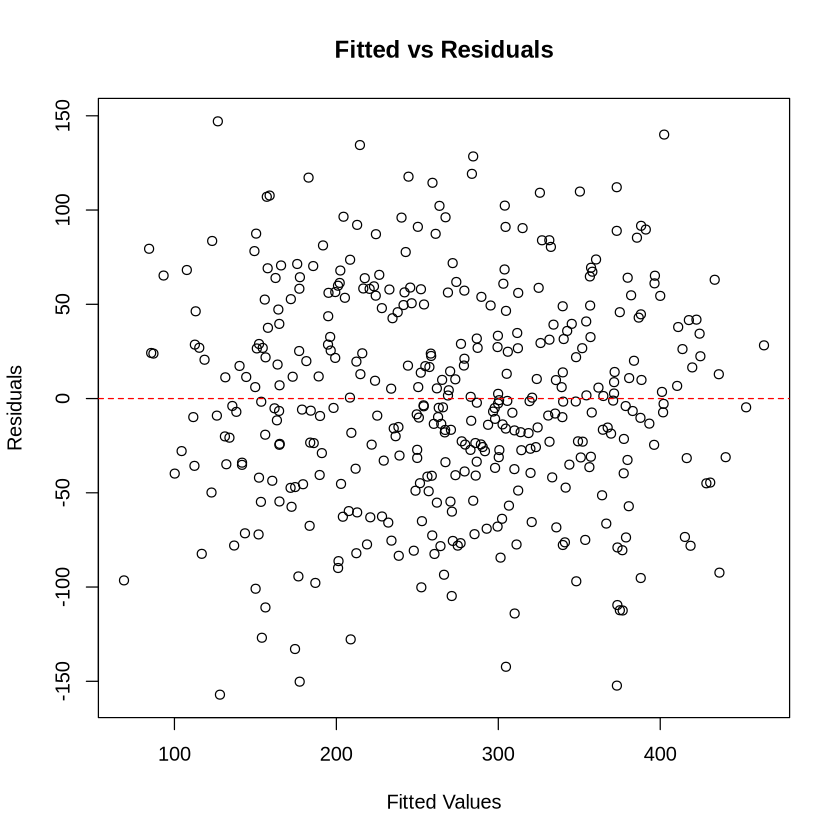

In [5]:
# Fitted vs residuals plot
plot(fitted(final_model), residuals(final_model),
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Fitted vs Residuals")
abline(h = 0, col = "red", lty = 2)

In [6]:
# Create an inference table
inference_table <- tidy(final_model, conf.int = TRUE)
inference_table

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.299387,10.8552226,0.5803094,5.620361e-01,-15.041683,27.640458
Number_of_Customers,2.908254,0.1067149,27.2525584,7.404421e-93,2.698456,3.118053
Menu_Price,2.066465,0.2524664,8.1851110,3.764442e-15,1.570123,2.562807
Marketing_Spend,4.427687,0.4962327,8.9226022,1.710514e-17,3.452107,5.403267


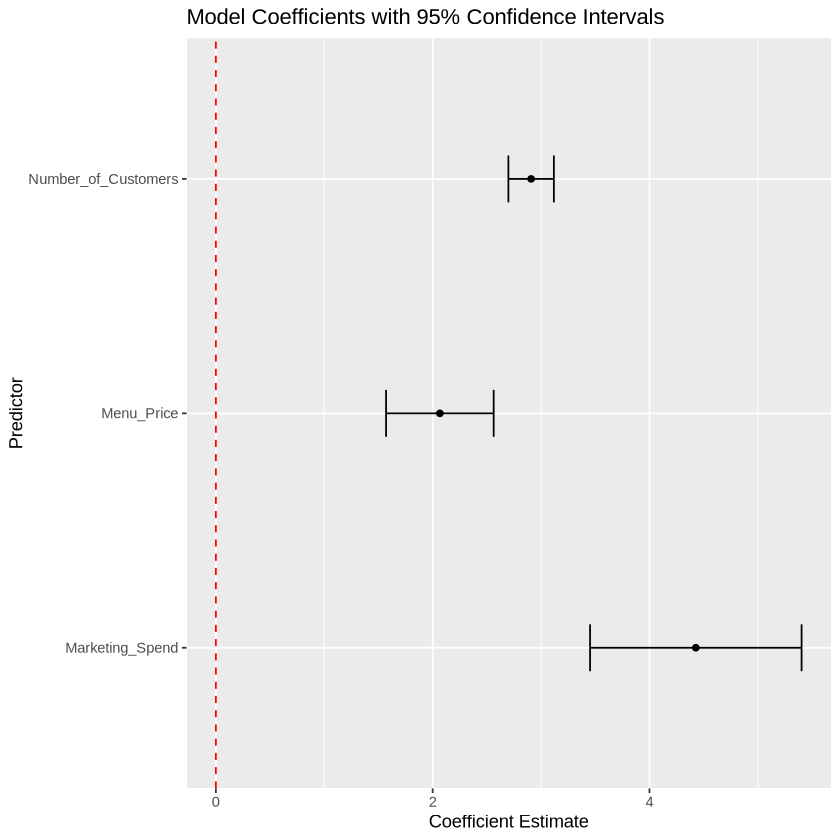

In [7]:
plot <- inference_table %>% filter(term != "(Intercept)") %>% 
ggplot(aes(x = estimate, y = term)) + 
geom_point() + 
geom_errorbarh(aes(xmin = conf.low, xmax = conf.high), height = 0.2) + geom_vline(xintercept = 0, linetype = "dashed", color = "red") + 
labs(title = "Model Coefficients with 95% Confidence Intervals", x = "Coefficient Estimate", y = "Predictor")
plot